In [25]:
%%time
%matplotlib inline

import pandas as pd
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

CPU times: user 2.72 ms, sys: 5.5 ms, total: 8.22 ms
Wall time: 13.5 ms


In [26]:
%%time
df = pd.read_csv('/Users/christopherpan 1/Desktop/All_Data/Train_Test_Set2/train_2_600_rnd2.csv',sep="|")

<string>:2: DtypeWarning: Columns (1,161653) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3min 35s, sys: 16.6 s, total: 3min 52s
Wall time: 3min 56s


In [27]:
%%time
df.shape

CPU times: user 25 µs, sys: 3 µs, total: 28 µs
Wall time: 31.9 µs


(600, 161658)

In [6]:
df.drop(df.columns[0], axis = 1) 

,file_name,C0000039,C0000052,C0000084,C0000096,C0000097,C0000098,C0000102,C0000119,C0000163,...,C3266800,C3266812,C3266814,C3266816,C3266817,file_name_intagged,CUI,Old_Tag,Max_Tag,Avg_Tag
0,867575-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,867575-overview,C0038454,1.000000,1.000000,0.395047
1,1162340-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1162340-overview,C0038454,1.000000,1.000000,0.535366
2,1162437-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1162437-overview,C0038454,1.000000,1.000000,0.666738
3,000328.htm,0,0,0,0,0,0,0,0,0,...,3,3,4,4,6,000328.htm,C0038454,1.000000,1.000000,1.000000
4,1161422-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1161422-overview,C0038454,1.000000,1.000000,1.000000
5,1163331-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1163331-overview,C0038454,1.000000,1.000000,0.446882
6,1159900-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1159900-overview,C0038454,1.000000,1.000000,0.549614
7,1160261-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1160261-overview,C0038454,1.000000,1.000000,0.661912
8,323409-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,323409-overview,C0038454,1.000000,1.000000,1.000000
9,1160021-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,1160021-overview,C0038454,1.000000,1.000000,1.000000


In [28]:
%%time
df['Max_Tag'].describe()

CPU times: user 20.6 ms, sys: 2.07 ms, total: 22.6 ms
Wall time: 22.8 ms


count    600.000000
mean       0.241159
std        0.152407
min       -0.024018
25%        0.145274
50%        0.217084
75%        0.315624
max        1.000000
Name: Max_Tag, dtype: float64

CPU times: user 266 ms, sys: 44 ms, total: 310 ms
Wall time: 449 ms


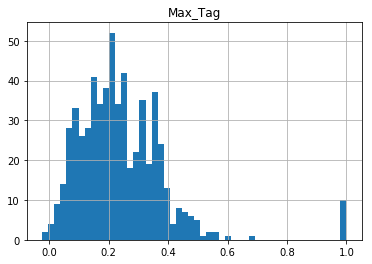

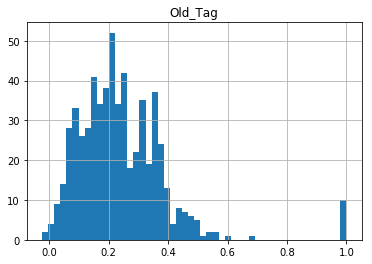

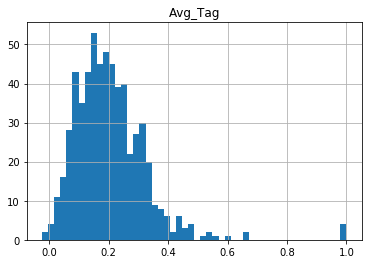

In [8]:
%%time
df.hist(column='Max_Tag', bins=50)
df.hist(column='Old_Tag', bins=50)
df.hist(column='Avg_Tag', bins=50)

In [29]:
%%time
df.isnull().values.any()

CPU times: user 214 ms, sys: 99.4 ms, total: 314 ms
Wall time: 281 ms


False

In [30]:
%%time
print('y <= 0.00       : ',len(df[(df['Max_Tag']<=0)]), 100*len(df[(df['Max_Tag']<=0)])/17248.0)
print('0.00 < y <= 0.05: ',len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)]), 100*len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)])//600.0)
print('0.05 < y <= 0.10: ',len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)]), 100*len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)])/600.0)
print('0.10 < y <= 0.20: ',len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)]), 100*len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)])/600.0)
print('0.20 < y <= 0.30: ',len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)]), 100*len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)])/600.0)
print('0.30 < y <= 0.40: ',len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)]), 100*len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)])/600.0)
print('0.40 < y <= 0.50: ',len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)]), 100*len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)])/600.0)
print('0.50 < y <= 0.60: ',len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)]), 100*len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)])/600.0)
print('0.60 < y <= 0.70: ',len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)]), 100*len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)])/600.0)
print('0.70 < y <= 0.80: ',len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)]), 100*len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)])/600.0)
print('0.80 < y <= 0.90: ',len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)]), 100*len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)])/600.0)
print('0.90 < y <= 1.00: ',len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)]), 100*len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)])/600.0)
print('1.00 < y <= 1.10: ',len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)]), 100*len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)])/600.0)

y <= 0.00       :  2 0.011595547309833023
0.00 < y <= 0.05:  20 3.0
0.05 < y <= 0.10:  69 11.5
0.10 < y <= 0.20:  156 26.0
0.20 < y <= 0.30:  171 28.5
0.30 < y <= 0.40:  131 21.833333333333332
0.40 < y <= 0.50:  31 5.166666666666667
0.50 < y <= 0.60:  9 1.5
0.60 < y <= 0.70:  1 0.16666666666666666
0.70 < y <= 0.80:  0 0.0
0.80 < y <= 0.90:  0 0.0
0.90 < y <= 1.00:  10 1.6666666666666667
1.00 < y <= 1.10:  0 0.0
CPU times: user 953 ms, sys: 475 ms, total: 1.43 s
Wall time: 1.46 s


In [11]:
clean_frame_train = df.drop(['file_name', 'file_name_intagged', 'CUI', 'Old_Tag', 'Avg_Tag'], axis=1, inplace=False)

In [31]:
from sklearn.model_selection import train_test_split

y = clean_frame_train.Max_Tag
#X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train_2, y, stratify = true, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train, y, test_size=0.20)

X_tr = X_train.drop(['Max_Tag'], axis=1)
X_vl = X_valid.drop(['Max_Tag'], axis=1)

X_tr = X_tr.as_matrix()
X_vl = X_vl.as_matrix()

y_tr = y_train.as_matrix()
y_vl = y_valid.as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:
clean_frame_train_2 = clean_frame_train.drop(['Max_Tag'], axis=1, inplace=False)

In [34]:
alphas = 10**np.linspace(6,-2,50)*0.5
alphas

array([5.00000000e+05, 3.43324423e+05, 2.35743318e+05, 1.61872877e+05,
       1.11149824e+05, 7.63208984e+04, 5.24056567e+04, 3.59842837e+04,
       2.47085668e+04, 1.69661089e+04, 1.16497591e+04, 7.99929360e+03,
       5.49270571e+03, 3.77156003e+03, 2.58973734e+03, 1.77824015e+03,
       1.22102655e+03, 8.38416468e+02, 5.75697700e+02, 3.95302161e+02,
       2.71433772e+02, 1.86379686e+02, 1.27977396e+02, 8.78755312e+01,
       6.03396320e+01, 4.14321386e+01, 2.84493301e+01, 1.95346997e+01,
       1.34134790e+01, 9.21034985e+00, 6.32427608e+00, 4.34255687e+00,
       2.98181166e+00, 2.04745753e+00, 1.40588435e+00, 9.65348864e-01,
       6.62855683e-01, 4.55149089e-01, 3.12527596e-01, 2.14596713e-01,
       1.47352585e-01, 1.01179482e-01, 6.94747747e-02, 4.77047738e-02,
       3.27564278e-02, 2.24921633e-02, 1.54442180e-02, 1.06047544e-02,
       7.28174239e-03, 5.00000000e-03])

In [35]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_tr, y_tr)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_tr, y_tr)
print("mse = ",mean_squared_error(y_vl, ridge6.predict(X_vl)))
print("best model coefficients:")
pd.Series(ridge6.coef_, index=clean_frame_train_2.columns)

Alpha= 60.339632031966445
mse =  0.015398716960734794
best model coefficients:


Unnamed: 0   -7.928494e-08
C0000039      0.000000e+00
C0000052      0.000000e+00
C0000084      0.000000e+00
C0000096      0.000000e+00
C0000097      0.000000e+00
C0000098      0.000000e+00
C0000102      0.000000e+00
C0000119      0.000000e+00
C0000163      0.000000e+00
C0000165      0.000000e+00
C0000167      0.000000e+00
C0000172      0.000000e+00
C0000176      0.000000e+00
C0000215      0.000000e+00
C0000232      0.000000e+00
C0000248      0.000000e+00
C0000254      0.000000e+00
C0000257      0.000000e+00
C0000263      0.000000e+00
C0000266      0.000000e+00
C0000268      0.000000e+00
C0000289      0.000000e+00
C0000291      0.000000e+00
C0000294      0.000000e+00
C0000300      0.000000e+00
C0000325      0.000000e+00
C0000340      0.000000e+00
C0000343      0.000000e+00
C0000359      0.000000e+00
                  ...     
C3266592      8.337646e-06
C3266603     -4.114625e-06
C3266605     -5.160045e-06
C3266608     -2.225594e-06
C3266609     -1.415262e-06
C3266610      5.221568e-06
C

In [36]:
print("mse ridge = ",mean_squared_error(y_vl, ridge6.predict(X_vl)))
#print("mse lasso = ",mean_squared_error(y_test, lasso.predict(X_test)))

mse ridge =  0.015398716960734794


In [37]:
print(y_vl, ridge6.predict(X_vl))

[ 0.19954054  0.21567041  0.25585987  0.28361012  0.2013274   0.29898957
  0.09365984  0.20431753  0.14713393  0.23228616  0.15868889  0.29949888
  0.10613139  0.13872787  0.21725822  0.10743312  0.34601167  0.08183369
  0.13609335  0.14555735  0.2504669   0.33284157  0.05931606  0.09544967
  0.30568789  0.15949772  0.22703094  0.25220544  0.35049621  0.1818372
  0.37179083  0.2127953   0.35930686  0.09377125  0.2298089   0.28458897
  0.19298281  0.30755161  0.22076009  0.3260604   0.13057266  0.25864285
  0.09544967  0.25671685  0.08947936  0.08669865  0.37261884  0.12793484
  0.18658142  0.08218579  0.15839392  1.          0.21591235  0.25952966
  0.1378104   0.0964158   0.34467517  0.35333171  0.33496275  0.50766887
  0.35814866  0.2467785   0.50766887  0.36876162  0.34576978  0.40037074
  0.23431756  0.12531752  0.44459335  0.25869207  0.35814866  0.23845726
  0.30456987  0.17197295  0.07744653  0.2796483   0.42171181  0.25585987
  0.07712546 -0.0240179   0.07861445  0.0976457   0.

In [38]:
y_pred_vl = ridge6.predict(X_vl)

In [39]:
y_pred_vl.shape

(120,)

In [40]:
ridge6.score(X_vl, y_vl, sample_weight=None)

0.05211926928265321